![](https://i.imgur.com/iWtMWh7.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv("student-por.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

## Attribute Information: (taken from [archive.ics.uci.edu](https://archive.ics.uci.edu/ml/datasets/Student+Performance))
### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
#### 1. ***school*** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
#### 2. ***sex*** - student's sex (binary: 'F' - female or 'M' - male)
#### 3. ***age*** - student's age (numeric: from 15 to 22)
#### 4. ***address*** - student's home address type (binary: 'U' - urban or 'R' - rural)
#### 5. ***famsize*** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
#### 6. ***Pstatus*** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
#### 7. ***Medu*** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
#### 8. ***Fedu*** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
#### 9. ***Mjob*** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
#### 10. ***Fjob*** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
#### 11. ***reason*** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
#### 12. ***guardian*** - student's guardian (nominal: 'mother', 'father' or 'other')
#### 13. ***traveltime*** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
#### 14. ***studytime*** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
#### 15. ***failures*** - number of past class failures (numeric: n if 1<=n<3, else 4)
#### 16. ***schoolsup*** - extra educational support (binary: yes or no)
#### 17. ***famsup*** - family educational support (binary: yes or no)
#### 18. ***paid*** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
#### 19. ***activities*** - extra-curricular activities (binary: yes or no)
#### 20. ***nursery*** - attended nursery school (binary: yes or no)
#### 21. ***higher*** - wants to take higher education (binary: yes or no)
#### 22. ***internet*** - Internet access at home (binary: yes or no)
#### 23. ***romantic*** - with a romantic relationship (binary: yes or no)
#### 24. ***famrel*** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
#### 25. ***freetime*** - free time after school (numeric: from 1 - very low to 5 - very high)
#### 26. ***goout*** - going out with friends (numeric: from 1 - very low to 5 - very high)
#### 27. ***Dalc*** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
#### 28. ***Walc*** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
#### 29. ***health*** - current health status (numeric: from 1 - very bad to 5 - very good)
#### 30. ***absences*** - number of school absences (numeric: from 0 to 93)

## these grades are related with the course subject, Math or Portuguese:
#### 31. ***G1*** - first period grade (numeric: from 0 to 20)
#### 32. ***G2*** - second period grade (numeric: from 0 to 20)
#### 33. ***G3*** - final grade (numeric: from 0 to 20, output target)



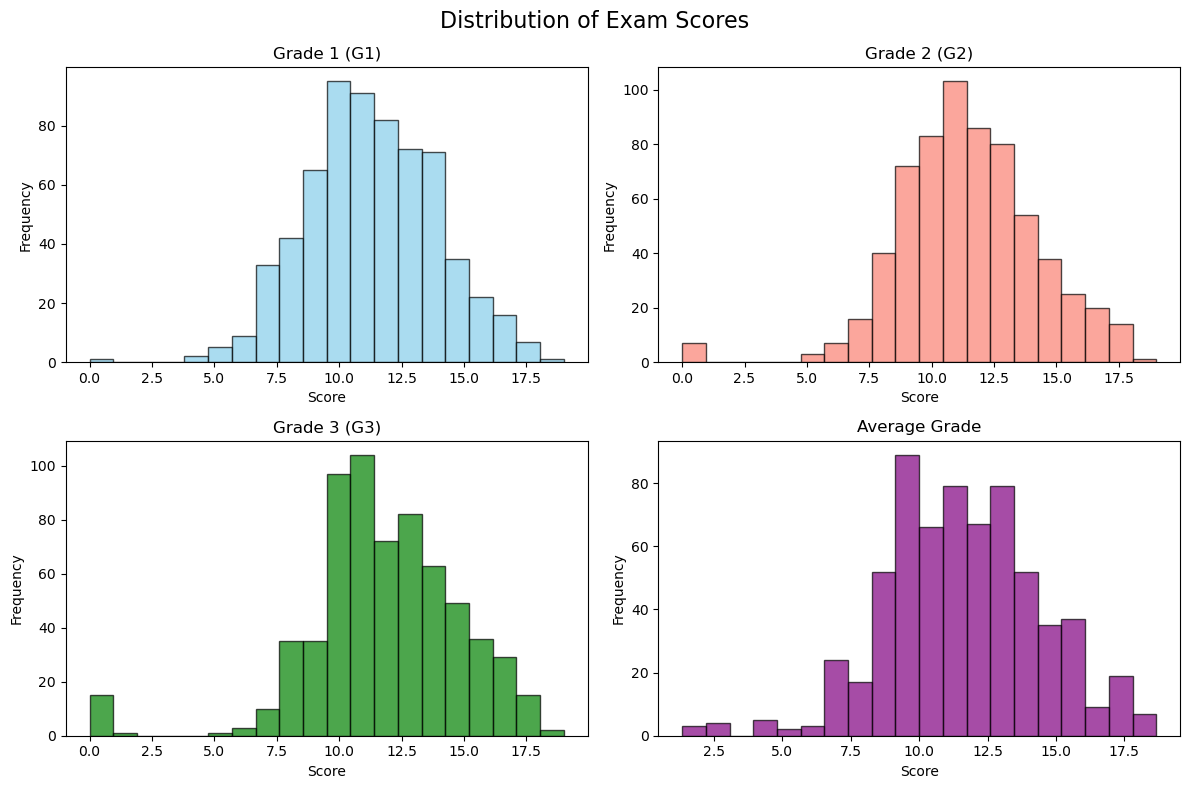

In [3]:
df['average_grade'] = (df['G1'] + df['G2'] + df['G3']) / 3

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].hist(df['G1'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axs[0, 1].hist(df['G2'], bins=20, color='salmon', edgecolor='black', alpha=0.7)
axs[1, 0].hist(df['G3'], bins=20, color='green', edgecolor='black', alpha=0.7)
axs[1, 1].hist(df['average_grade'], bins=20, color='purple', edgecolor='black', alpha=0.7)

axs[0, 0].set_title('Grade 1 (G1)')
axs[0, 1].set_title('Grade 2 (G2)')
axs[1, 0].set_title('Grade 3 (G3)')
axs[1, 1].set_title('Average Grade')

for ax in axs.flat:
    ax.set_xlabel('Score')
    ax.set_ylabel('Frequency')

fig.suptitle("Distribution of Exam Scores", fontsize=16)

plt.tight_layout()
plt.show()


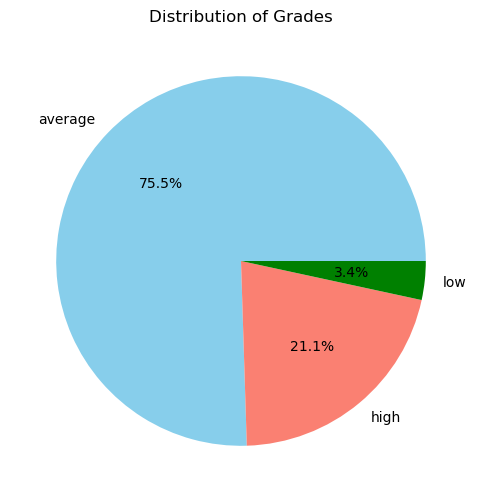

In [4]:
#df['average_grade'] = (df['G1'] + df['G2'] + df['G3']) / 3

def marks(total_grades):
    if total_grades < 7:
        return "low"
    elif 7 <= total_grades < 14:
        return "average"
    else:
        return "high"

df["grades"] = df["average_grade"].apply(marks)

plt.figure(figsize=(6, 6))
df["grades"].value_counts().plot(kind="pie", autopct='%1.1f%%', colors=['skyblue', 'salmon', 'green'])
plt.title("Distribution of Grades")
plt.ylabel("")
plt.show()


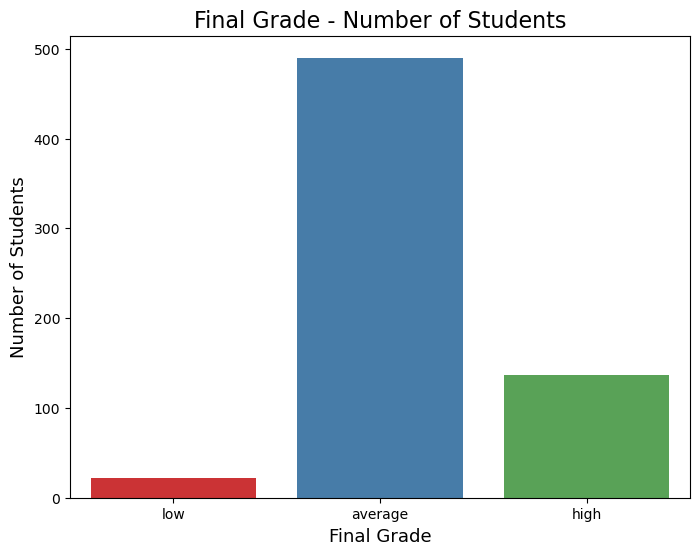

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(x="grades", data=df, order=["low", "average", "high"], palette='Set1')
plt.title('Final Grade - Number of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=13)
plt.ylabel('Number of Students', fontsize=13)
plt.show()

In [6]:
for col in df.columns:
  if type(df[col][0]) is str:
    print(col,df[col].unique())

school ['GP' 'MS']
sex ['F' 'M']
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T']
Mjob ['at_home' 'health' 'other' 'services' 'teacher']
Fjob ['teacher' 'other' 'services' 'health' 'at_home']
reason ['course' 'other' 'home' 'reputation']
guardian ['mother' 'father' 'other']
schoolsup ['yes' 'no']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['no' 'yes']
romantic ['no' 'yes']
grades ['average' 'high' 'low']


C:\Users\midoe\AppData\Local\Temp\ipykernel_27604\1619078666.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

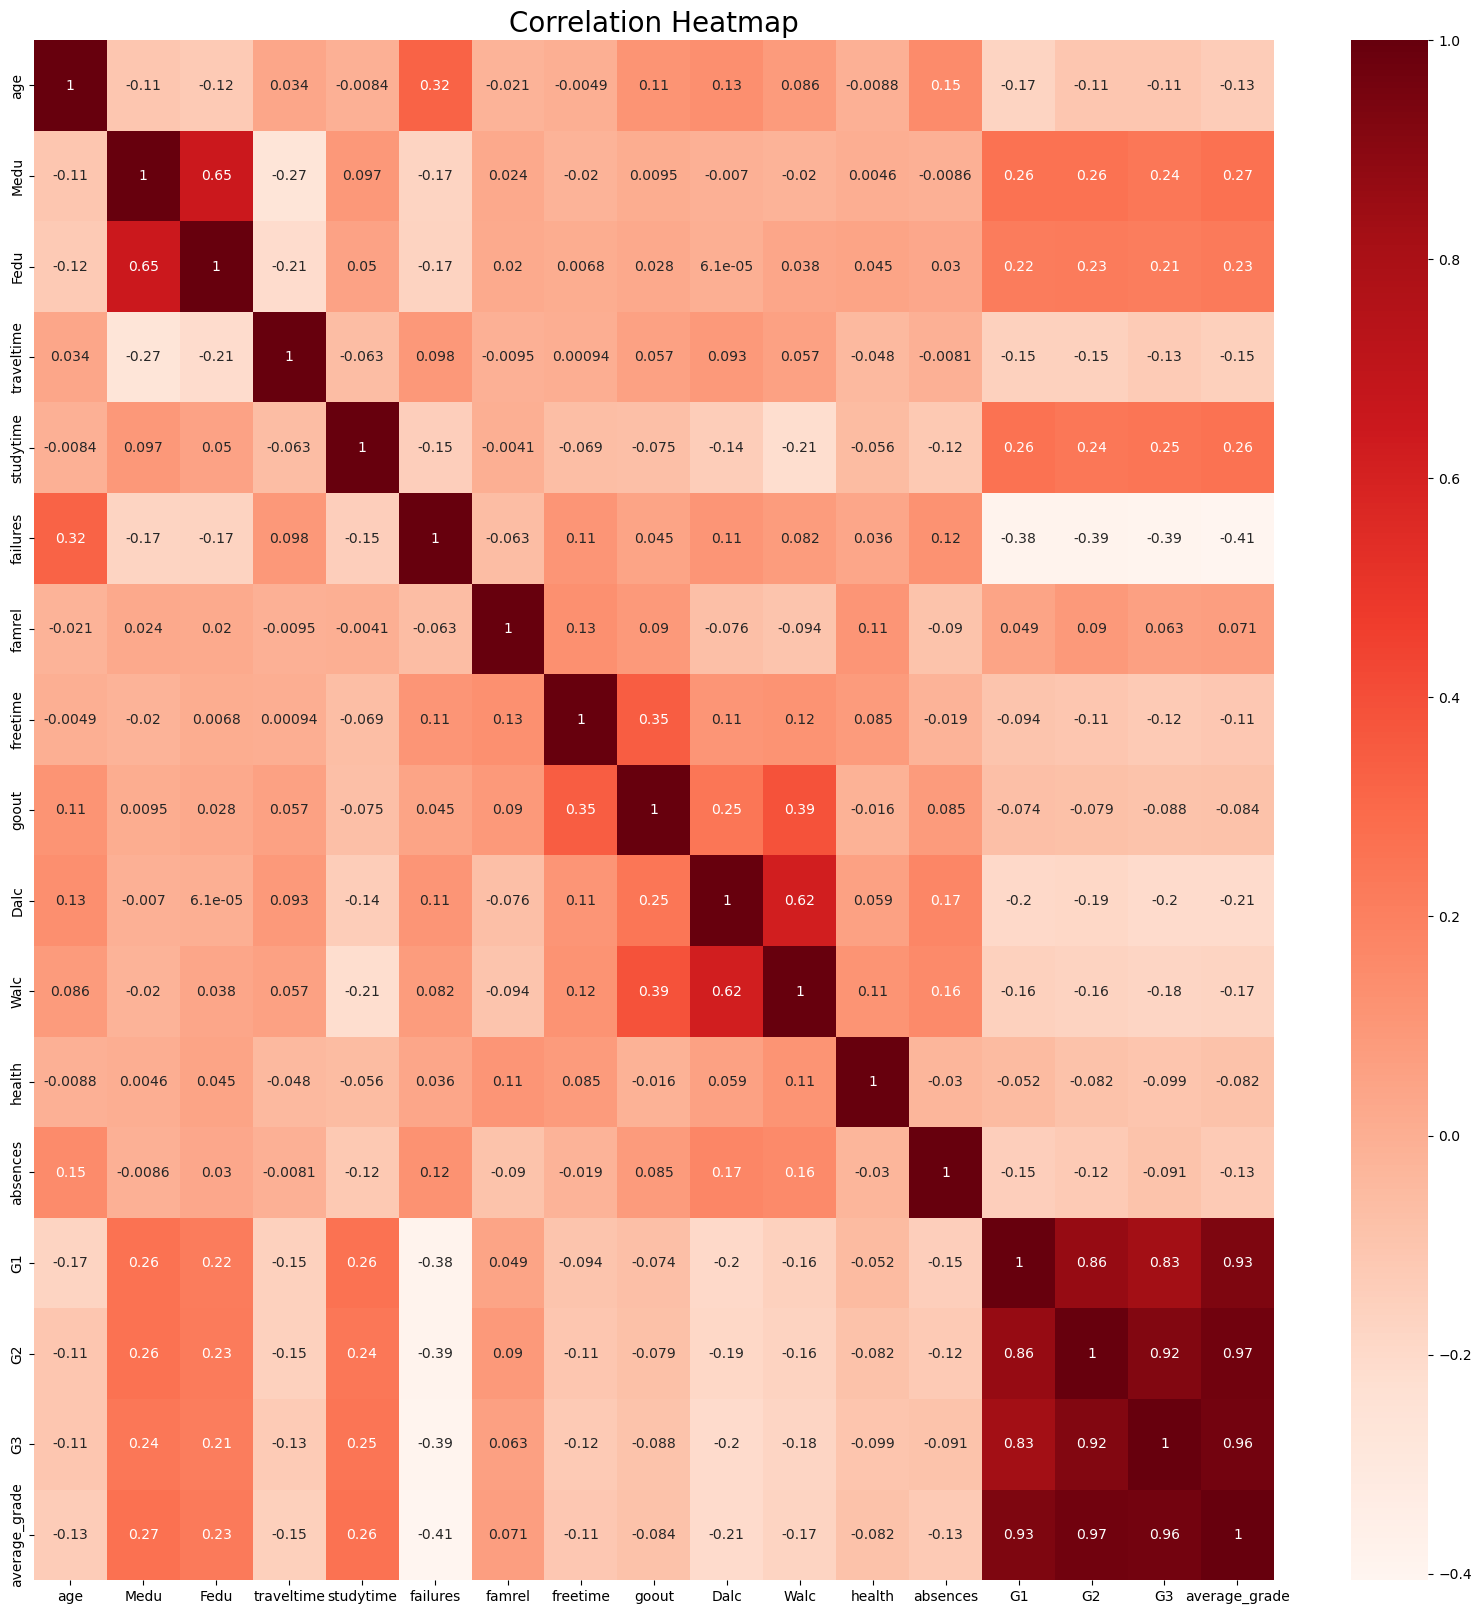

In [7]:
#describing correlation
corr=df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

# Opject Data

In [8]:
object_columns = df.select_dtypes(include='object')
object_columns

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,grades
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no,average
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no,average
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no,average
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,no,yes,yes,yes,yes,yes,high
4,GP,F,U,GT3,T,other,other,home,father,no,yes,no,no,yes,yes,no,no,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,services,other,course,mother,no,no,no,yes,no,yes,yes,no,average
645,MS,F,U,LE3,T,teacher,services,course,mother,no,yes,no,no,yes,yes,yes,no,high
646,MS,F,U,GT3,T,other,other,course,mother,no,no,no,yes,yes,yes,no,no,average
647,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no,average


## Categorical Features Analysis for Grades 

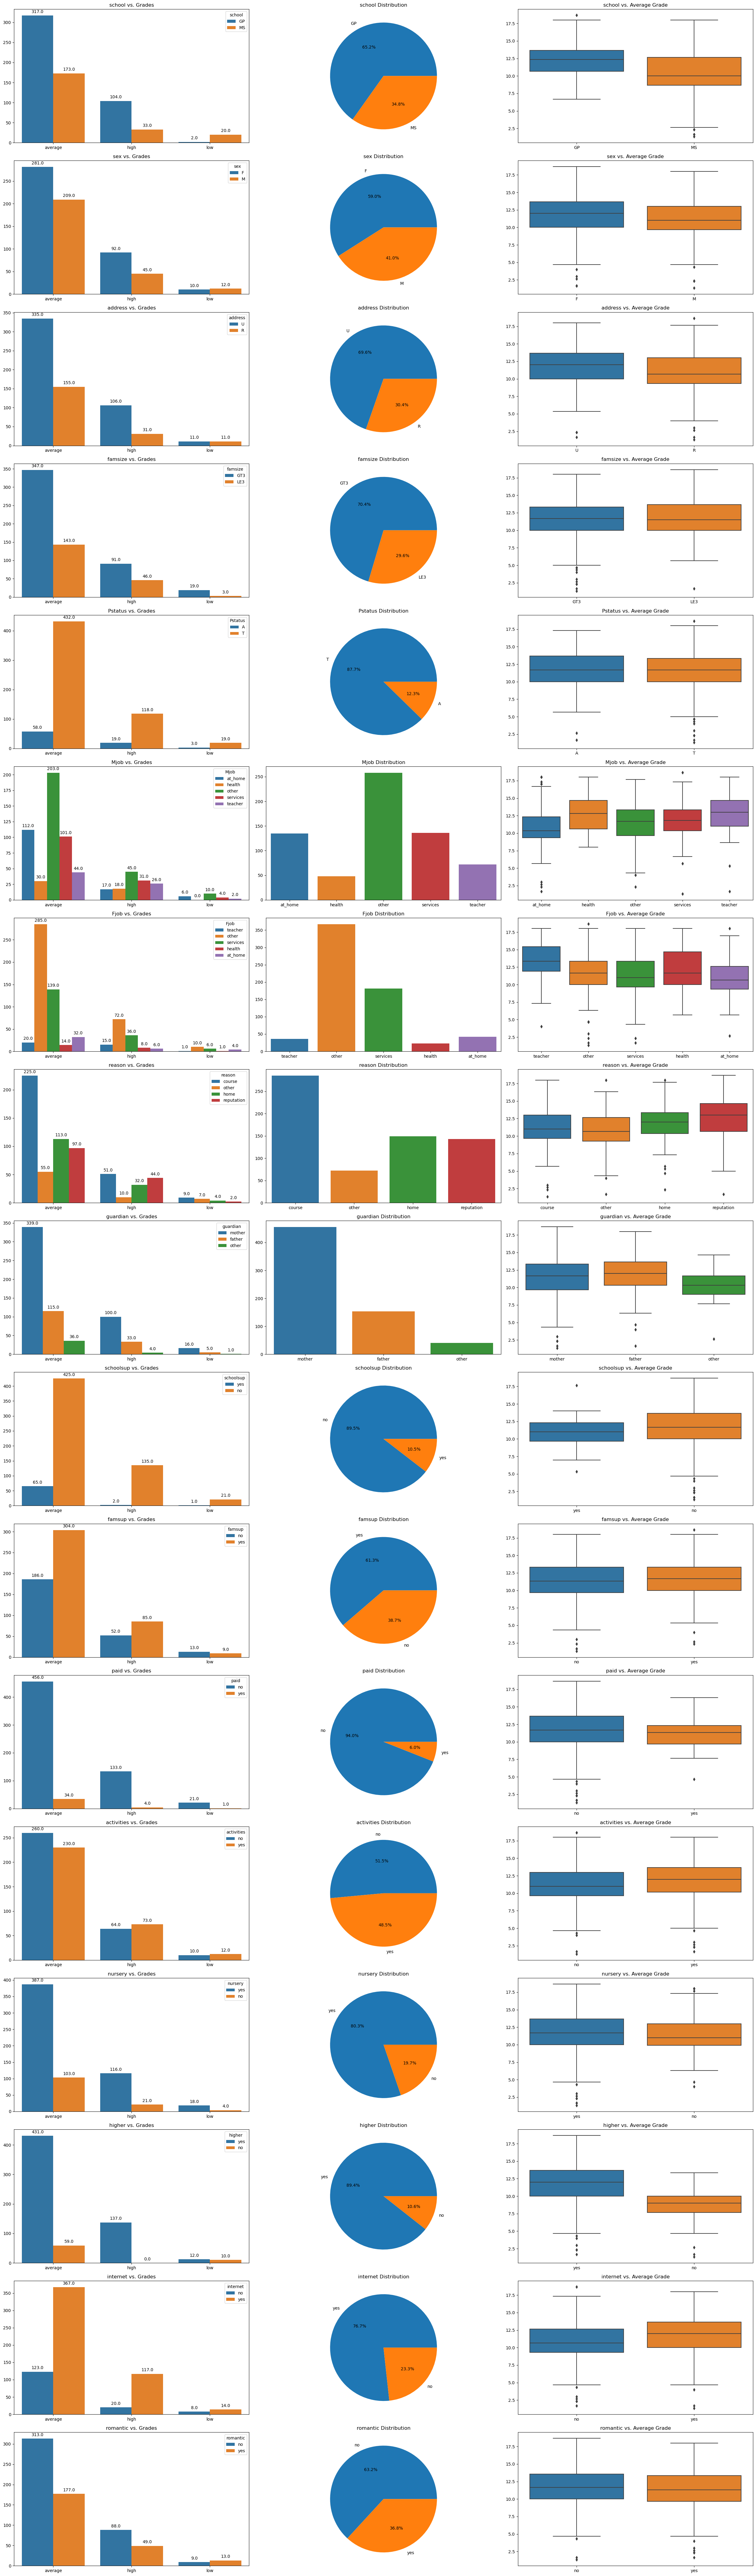

In [9]:
def plot_categorical_Grade(categorical_columns):
    nrows, ncols = categorical_columns.shape[1], 3
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 85))

    for idx, column in enumerate(categorical_columns):
        ax = axes[idx]
        sns.countplot(data=df, x='grades', hue=column, ax=ax[0])
        
        for p in ax[0].patches:
            ax[0].annotate(format(p.get_height(), '.1f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='center', 
                           xytext=(0, 9), 
                           textcoords='offset points')
        
        if len(df[column].unique()) == 2:
            df[column].value_counts().plot(kind='pie', ax=ax[1], autopct='%1.1f%%')
            ax[1].set_title(f'{column} Distribution')
            ax[1].set_ylabel('')
        else:
            sns.countplot(data=df, x=column, ax=ax[1])
            ax[1].set_title(f'{column} Distribution') 
            
        sns.boxplot(data=df, x=column, y='average_grade', ax=ax[2])
        
        ax[0].set_title(f'{column} vs. Grades')
        ax[1].set_title(f'{column} Distribution')
        ax[2].set_title(f'{column} vs. Average Grade')

        for a in ax:
            a.set_xlabel('')
            a.set_ylabel('')

    plt.tight_layout()

    plt.show()

columns = df.select_dtypes(include='object')
columns = columns.drop('grades', axis=1)
plot_categorical_Grade(columns)


# Categorical Features Analysis for Age and Gendre 

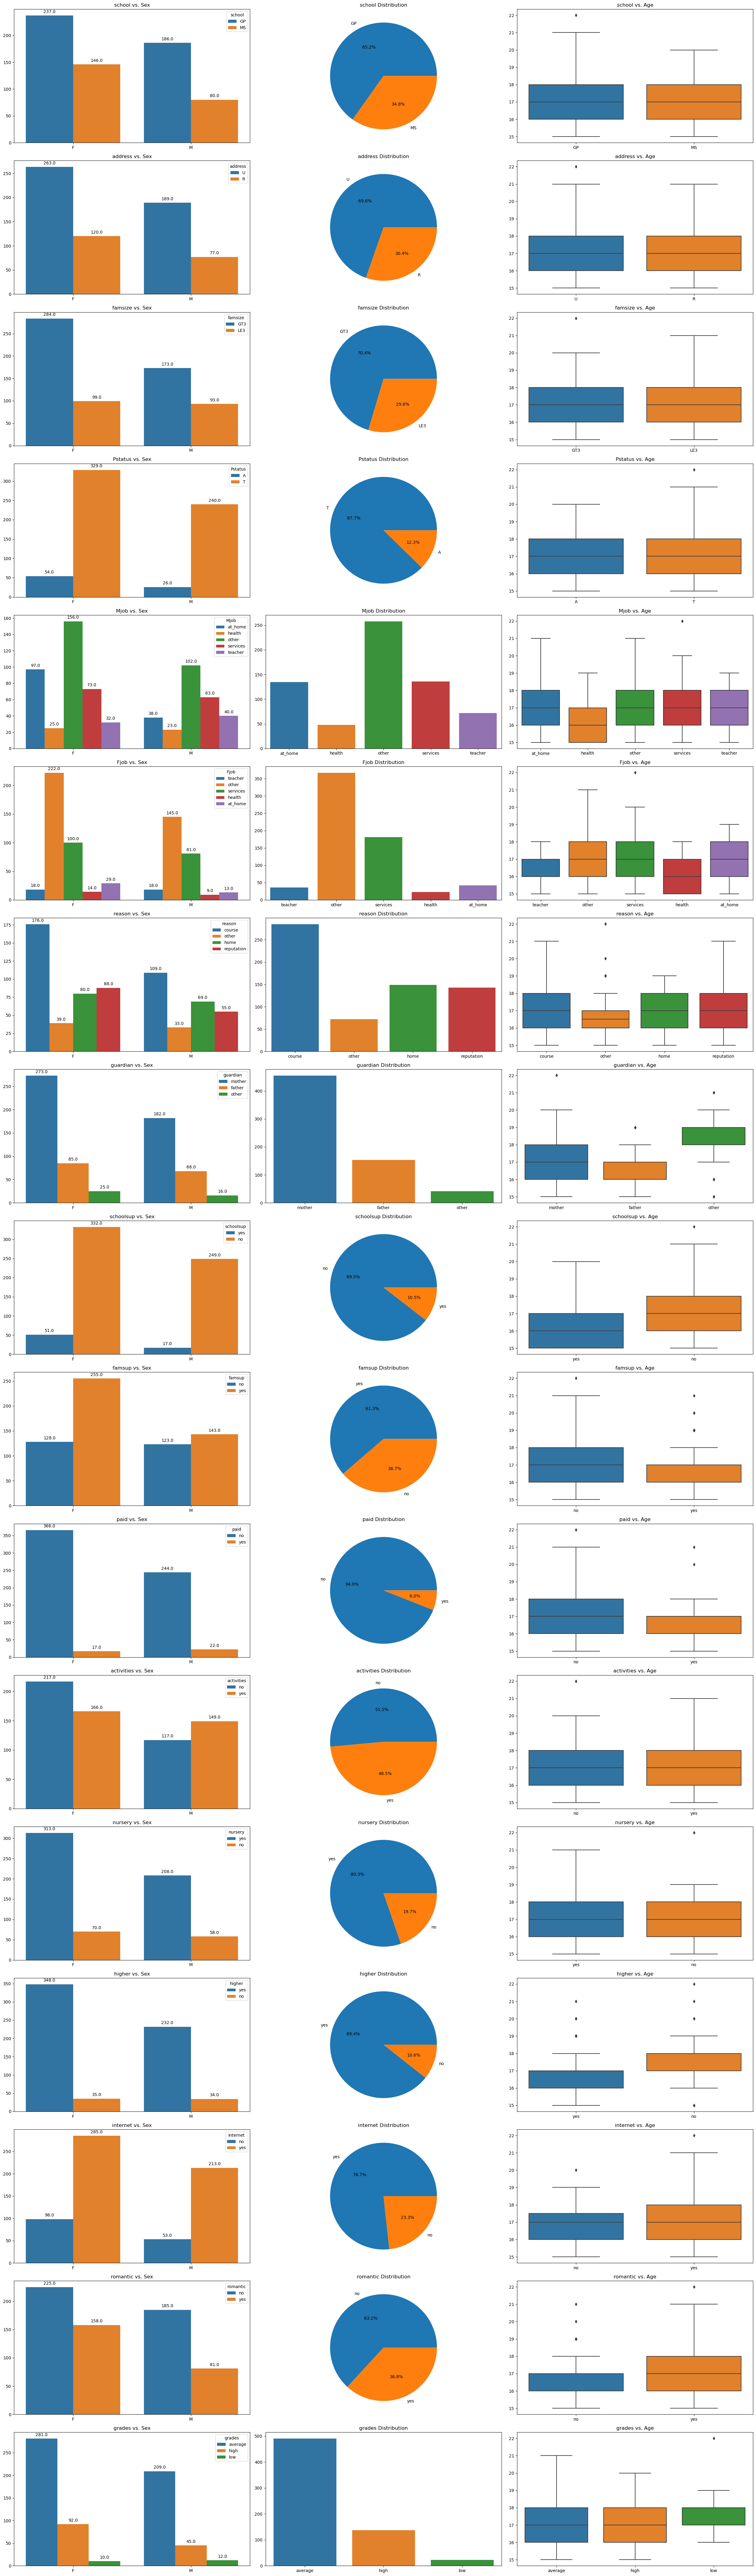

In [10]:
def plot_categorical_age(categorical_columns):
    nrows, ncols = categorical_columns.shape[1], 3
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 85))

    for idx, column in enumerate(categorical_columns):
        ax = axes[idx]
        sns.countplot(data=df, x='sex', hue=column, ax=ax[0])
        
        for p in ax[0].patches:
            ax[0].annotate(format(p.get_height(), '.1f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='center', 
                           xytext=(0, 9), 
                           textcoords='offset points')
        
        if len(df[column].unique()) == 2:
            df[column].value_counts().plot(kind='pie', ax=ax[1], autopct='%1.1f%%')
            ax[1].set_title(f'{column} Distribution')
        else:
            sns.countplot(data=df, x=column, ax=ax[1])
            ax[1].set_title(f'{column} Distribution') 
            
        sns.boxplot(data=df, x=column, y='age', ax=ax[2])

        ax[0].set_title(f'{column} vs. Sex')
        ax[1].set_title(f'{column} Distribution')
        ax[2].set_title(f'{column} vs. Age')

        for a in ax:
            a.set_xlabel('')
            a.set_ylabel('')

    plt.tight_layout()

    plt.show()

columns = df.select_dtypes(include='object')
columns = columns.drop('sex', axis=1)
plot_categorical_age(columns)

# Non Object Data

In [11]:
non_object_columns = df.select_dtypes(exclude='object')
non_object_columns

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,average_grade
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11,7.333333
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11,10.333333
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12,12.333333
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14,14.000000
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13,12.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,2,5,4,10,11,10,10.333333
645,18,3,1,1,2,0,4,3,4,1,1,1,4,15,15,16,15.333333
646,18,1,1,2,2,0,1,1,1,1,1,5,6,11,12,9,10.666667
647,17,3,1,2,1,0,2,4,5,3,4,2,6,10,10,10,10.000000


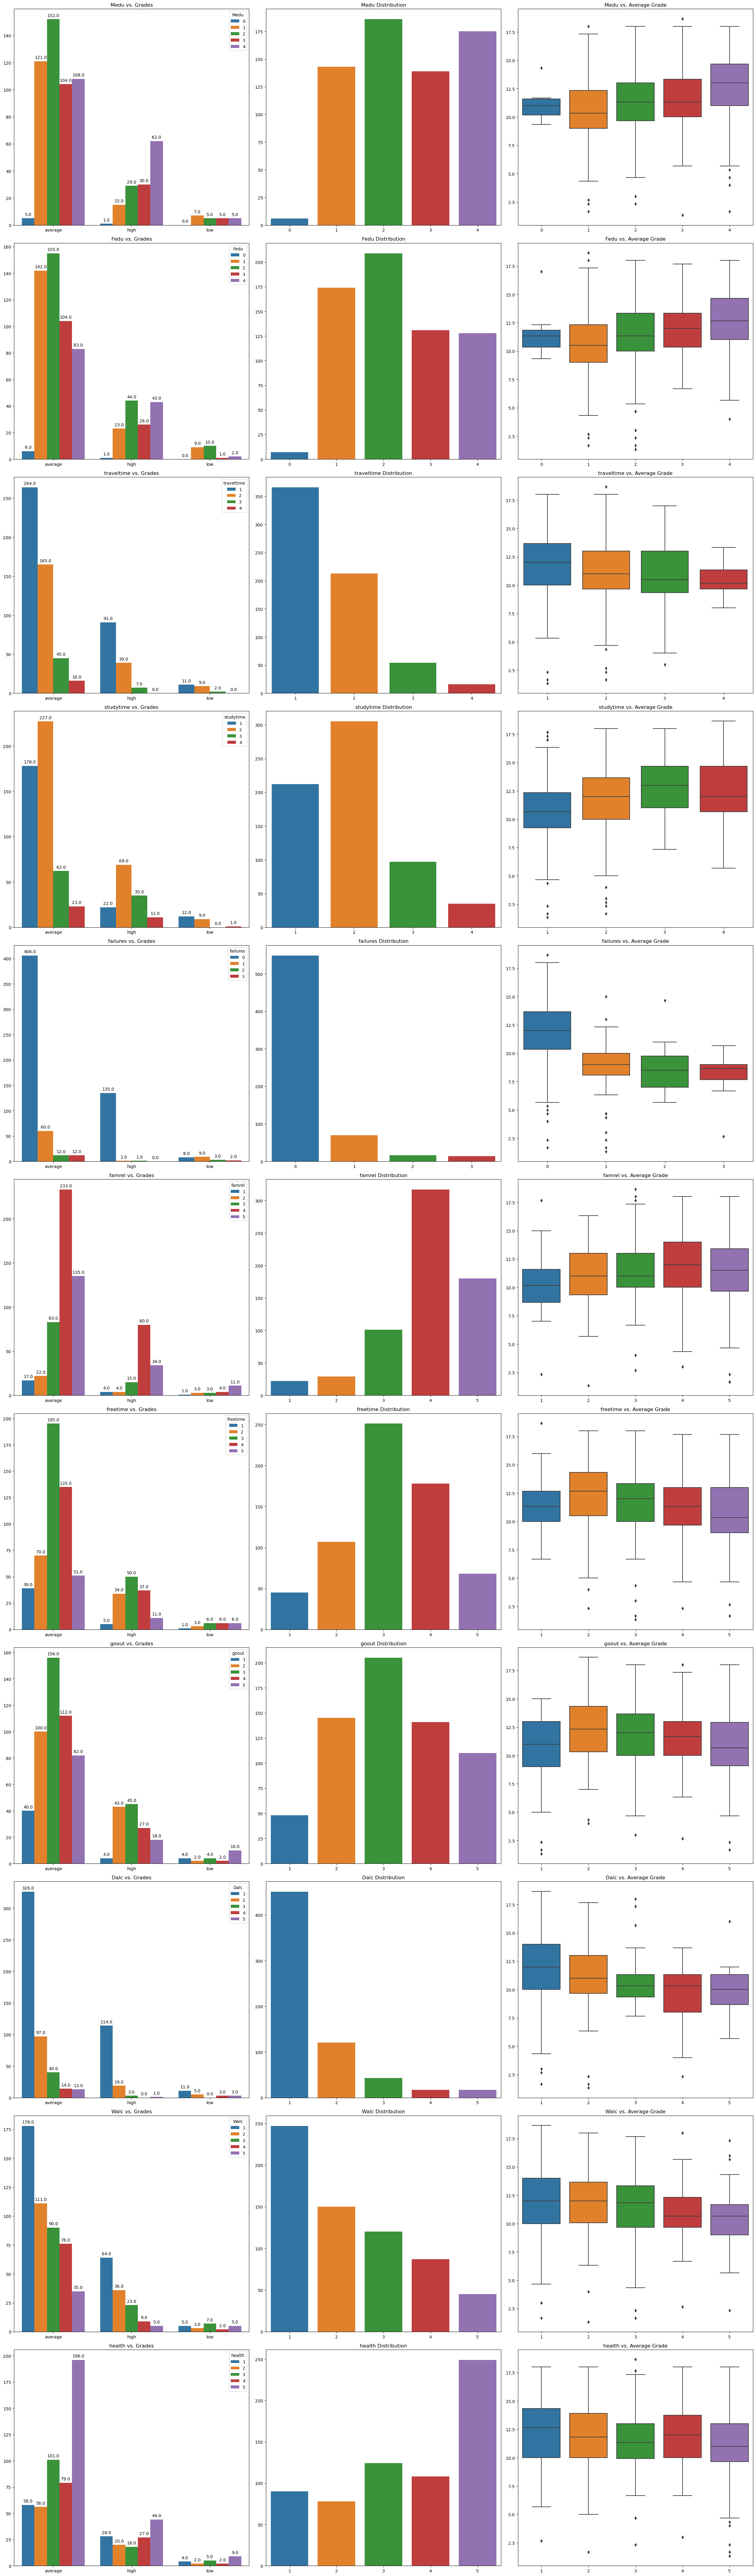

In [12]:
def plot_categorical_Grade(categorical_columns):
    nrows, ncols = categorical_columns.shape[1], 3
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 85))

    for idx, column in enumerate(categorical_columns):
        ax = axes[idx]
        sns.countplot(data=df, x='grades', hue=column, ax=ax[0])
        
        for p in ax[0].patches:
            ax[0].annotate(format(p.get_height(), '.1f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='center', 
                           xytext=(0, 9), 
                           textcoords='offset points')
        
        
        if len(df[column].unique()) == 2:
            df[column].value_counts().plot(kind='pie', ax=ax[1], autopct='%1.1f%%')
            ax[1].set_title(f'{column} Distribution')
            ax[1].set_ylabel('')
        else:
            sns.countplot(data=df, x=column, ax=ax[1])
            ax[1].set_title(f'{column} Distribution') 
            
        sns.boxplot(data=df, x=column, y='average_grade', ax=ax[2])
        
        ax[0].set_title(f'{column} vs. Grades')
        ax[1].set_title(f'{column} Distribution')
        ax[2].set_title(f'{column} vs. Average Grade')

        for a in ax:
            a.set_xlabel('')
            a.set_ylabel('')

    plt.tight_layout()

    plt.show()

columns = df.select_dtypes(exclude='object')
columns = columns.drop(['average_grade','age','G1','G2','G3','absences'], axis=1)
plot_categorical_Grade(columns)
